# Изучение тенденций рынка компьютерных игр



## Часть 1. Изучение общей информации

In [1]:
#импортируем бибилиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
#загружаем данные из файла в датафрейм data
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('datasets/games.csv')

Представим краткий обзор данных: посмотрим на таблицу, выведем общую информацию о датафрейме, изучим типы столбцов 

In [3]:
#выводим на экран первые 20 строчек датафрейма
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем основную информацию о датафрейме с помощью метода info()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод**\
Всего в таблице 16715 строк. Датафрейм содержит 11 столбцов с данными. Часть данных в некоторых столбцах пропущена. 6 столбцов содержат вещественный тип данных, 5 - тип 'object'.

## Часть 2. Подготовка данных к анализу (предобработка данных)

На этапе изучения информации о датафрейме были замечены некоторые ошибки, которые необходимо обработать. \
Необходимо заменить названия столбцов (привести их к нижнему регистру)\
Преобразовать тип данных в некоторых столбцах\
Также необходимо поискать дубликаты, проанализировать пропуски и по возможности их заполнить

In [5]:
#Приведем названия столбцов к нижнему регистру и выведем спиок названий на экран
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

В датафрейме целесообразно изменить типы данных у двух столбцов:
- 'year_of_release': тип float заменить на int, поскольку год - это целочисленное значение
- 'user_score': тип object заменить на float, поскольку рейтинг - это вещественное число. 
Перед этим необходимо поработать с пропусками в этих столбцах

In [6]:
# Посчитаем количество пропусков в каждом столбце датафрейма
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
# Посмотрим визуально на пропуски в столбце 'name'
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Поскольку это всего две строки, и относятся они к далекому 1993 году и восстановить их возможности нет, то мы можем их удалить

In [8]:
# Удаляем строки с пустыми значениями в столбце 'name'
data = data.dropna(subset = ['name'])

Рассмотрим более подробно пропуски в столбце 'year_of_release'. Проанализируем, не зависят ли пропуски от названия платформы или названия игры.

In [9]:
# Проверяем, на каких платформах есть пропуски в столбце 'year_of_release'
data[data['year_of_release'].isnull()]['platform'].unique()

array(['PS2', 'Wii', '2600', 'X360', 'GBA', 'PC', 'PS3', 'PS', 'PSP',
       'XB', 'GB', 'DS', 'GC', '3DS', 'N64', 'PSV'], dtype=object)

In [10]:
# Проверяем, у каких игр есть пропуски в столбце 'year_of_release'
data[data['year_of_release'].isnull()]['name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

Явных зависимостей не находим, пропуски есть на всех платформах и у многих игр. Восстановить данные затруднительно, а  поскольку общая их доля составляет всего 1,6%, то мы вполне можем их удалить.\
Пропуски в столбцах 'name', 'years_of_release' скорее всего случайны и связаны с человеческим фактором либо технической ошибкой.

In [11]:
# Удаляем строки с пустыми значениями в столбце 'year_of_release'
data = data.dropna(subset = ['year_of_release'])

Рассмотрим теперь уникальные значения и пропуски в столбцах 'user_score', 'critic_score', 'rating'

In [12]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В числе уникальных значений можно увидеть значение 'tbd'- это аббревиатура от английского To Be Determined (будет определено). Это значит, что  либо отзывов вообще не было, либо их количества недостаточно для формирования рейтинга. Поэтому логично заменить это значение на NaN.\
В целом, логично предположить, что пропуски в ячейках в этом столбце не случайны. Скорее всего, пропуски связаны с тем, что на определенную игру не поступило оценок по причине ее непопулярности, либо игра новая и не успела набрать необходимое число отзывов. Не исключен также вариант технических ошибок при заполнении датафрейма. Оставим пропуски не заполненными.

In [13]:
# Меняем 'tbd' на NaN
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

In [14]:
# Изучаем уникальные значения в столбце 'critic_score'
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Здесь, скорее всего, ситуация с пропусками такая же, как и в столбце 'user_score'. Поэтому заполнять пропуски не будем.

In [15]:
# Изучаем уникальные значения в столбце 'rating'
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [16]:
# Посчитаем количество повторений всех значений рейтингов
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Рейтинги для компьютерных игр определяет компания Entertainment Software Rating Board (ESRB) - негосударственная организация. Основное направление деятельности — принятие и определение рейтингов для компьютерных и видеоигр и другого развлекательного программного обеспечения в США и Канаде. Возможны разные варианты, почему пропущены значения в этом столбце - это может быть другая страна, игра новая и ее рейтинг еще не определен, технические ошибки заполнения. Во всех строках с пропусками в данном столбце можно заменить Nan на значение 'undefined'\
Кроме того, заменим редкие/устаревшие значения на частые аналоги.
Здесь мы видим значение "K-A" ("Kids to Adults") - "Детям и взрослым" и "EC" ("Early childhood") -"Для детей младшего возраста", что вполне может соответствовать категории "E" ("Everyone") — "Для всех". Еще одно редкое значение "AO" ("Adults Only") — "Только для взрослых" можно заменить на категорию "M" ("Mature") — "Для взрослых". Категорию "RP"("Rating Pending") — "Рейтинг ожидается" заменим на значение 'undefined'.

In [17]:
# Заменяем пропуски и редкие значения в столбце 'rating'
data['rating']= data['rating'].fillna('undefined')
data['rating']=data['rating'].replace('RP', 'undefined')
data['rating']=data['rating'].replace(['K-A', 'EC'], 'E')
data['rating']=data['rating'].replace('AO', 'M')

In [18]:
# Посмотрим на результаты замены
data['rating'].value_counts()

undefined    6677
E            3932
T            2905
M            1537
E10+         1393
Name: rating, dtype: int64

In [19]:
# Проверяем число пропусков после обработки данных
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Теперь можно заменить тип данных в столбцах 'year_of_release' и 'user_score' на более подходящие

In [20]:
# Меняем тип данных в столбце 'year_of_release' на int
data['year_of_release'] = data['year_of_release'].astype(int)
# Меняем тип данных в столбце 'user_score' на float
data['user_score'] = data['user_score'].astype(float)

Проверим также датасет на наличие дубликатов

In [21]:
data.duplicated().sum()

0

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец 'total_sales'

In [22]:
#data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [23]:
# Выводим на экран первые 5 строк подготовленной к анализу таблицы
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


**Вывод**\
Таким образом, мы провели предварительную обработку полученных данных. В датасете изменили наименования столбцов(изменили регистр), изменили тип данных для двух столбцов 'year_of_release' и 'user_score' на более подходящие, а также проанализировали пропуски и с некоторыми из них провели работу (удалили строки с пропусками в столбцах 'name', 'year_of_release'; заменили пропуски в столбце 'rating' на значение 'undefined'. А также заменили в столбце 'user_score' значение  'tbd' на NaN, а в столбце 'rating' заменили редкие значения на частые аналоги.

## Часть 3. Исследовательский анализ данных

Перед тем, как проводить исследовательский анализ данных, проанализируем описательные статистики числовых столбцов на предмет аномальных (например, отрицательных) значений, применив метод describe().

In [24]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Аномальных значений, судя по таблице, не наблюдается.

Посмотрим, сколько игр выпускалось в разные годы, построив гистограмму распределения

Text(0, 0.5, 'Количество игр')

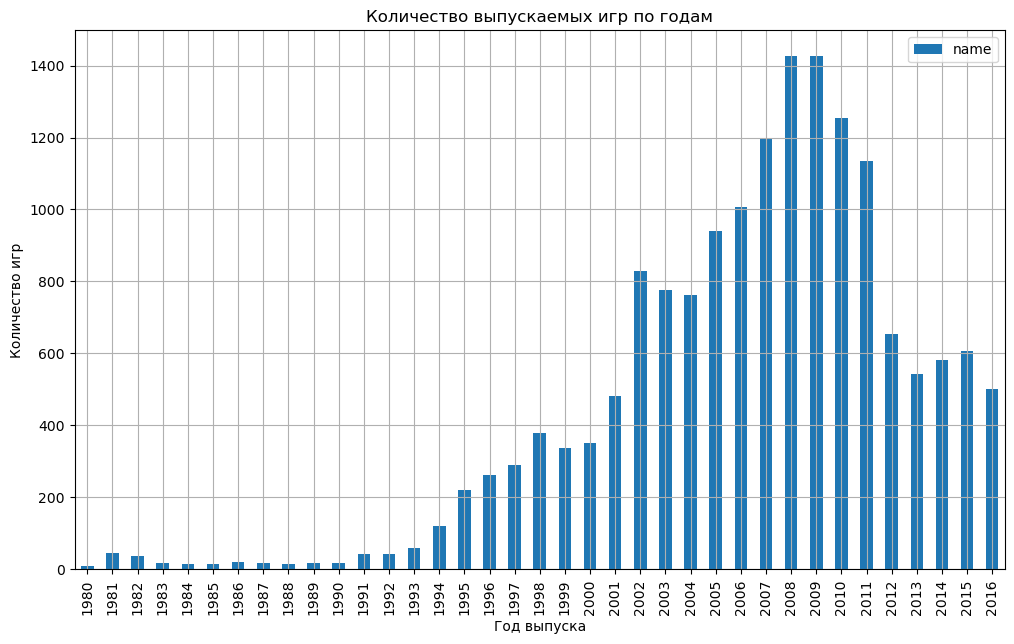

In [25]:
#data['year_of_release'].hist(bins = 37, range=(1980, 2016), figsize = (12,7))
# Задаем название для гистограммы
#plt.title('Количество игр в разные годы', fontsize= 14)
#plt.show
# Создаем сводную таблицу: группируем по столбцу 'year_of_release' и рассчитываем количество для значений из столбца 'name'
table_platforms = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
# Строим диаграмму
table_platforms.plot(y='name', kind='bar', grid=True, figsize = (12,7))
plt.title('Количество выпускаемых игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')

По нашему графику видно, что до 1994-1995 годов компьютерные игры практически не выпускались. Но после 1994 года, в связи с развитием информационных технологий, мы видим стабильный рост, а после 2000 года - резкий рост, пик которого приходится на 2008-2009 годы. После 2009 года мы наблюдаем спад, связанный, скорее всего, с разработкой и внедрением мобильных устройств и бурным развитием социальных сетей. Часть целевой аудитории компьютерных игр перешла на мобильные игры и игры на площадках социальных сетей.\
Для выявления тенденций и закономерностей нам важнее всего проанализировать актуальный период - последние 2-3 года

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

Text(0, 0.5, 'Количество продаж')

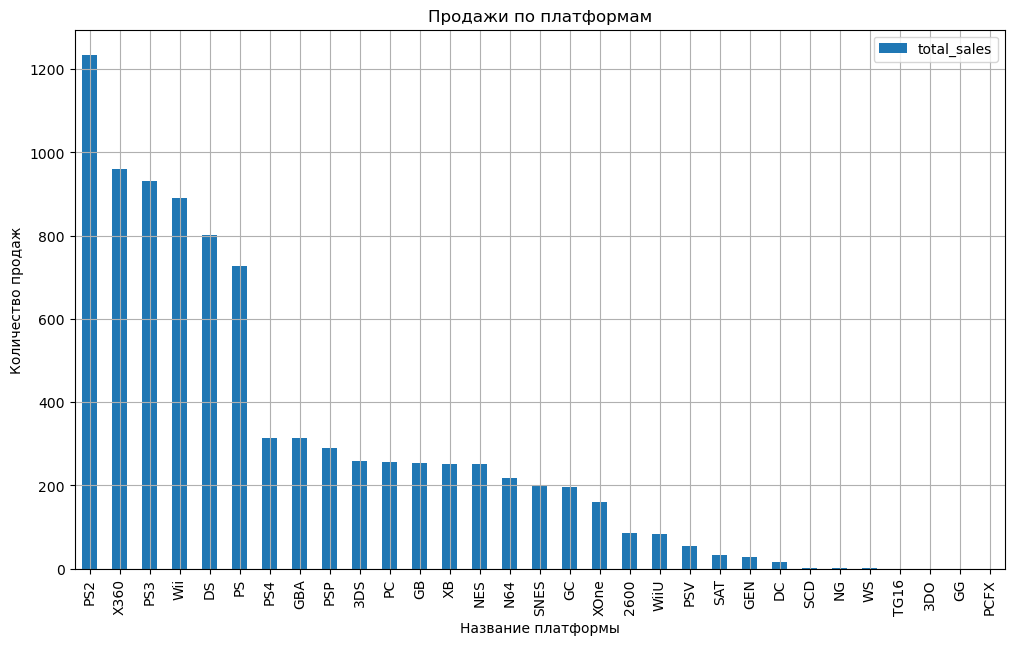

In [26]:
# Создаем сводную таблицу: группируем по столбцу 'platform' и рассчитываем сумму для значений из столбца 'total_sales'
table_platforms = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending=False)
# Строим диаграмму
table_platforms.plot(y='total_sales', kind='bar', grid=True, figsize = (12,7))
plt.title('Продажи по платформам')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')

Из гистограммы видно, что наибольшее число продаж приходится на следующие шесть платформ: PS2, X360, PS3, Wii, Ds, PS. Построим для них распределение по годам

In [27]:
# записываем информацию о топ-6 платформах в список
top6_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

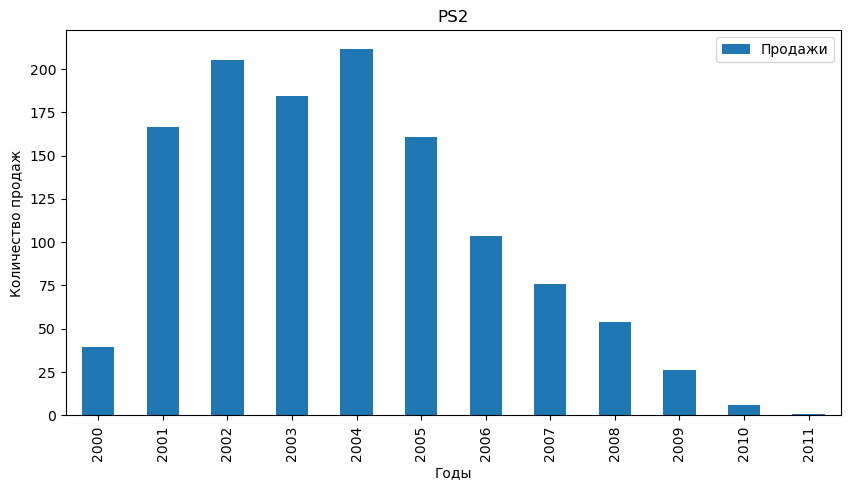

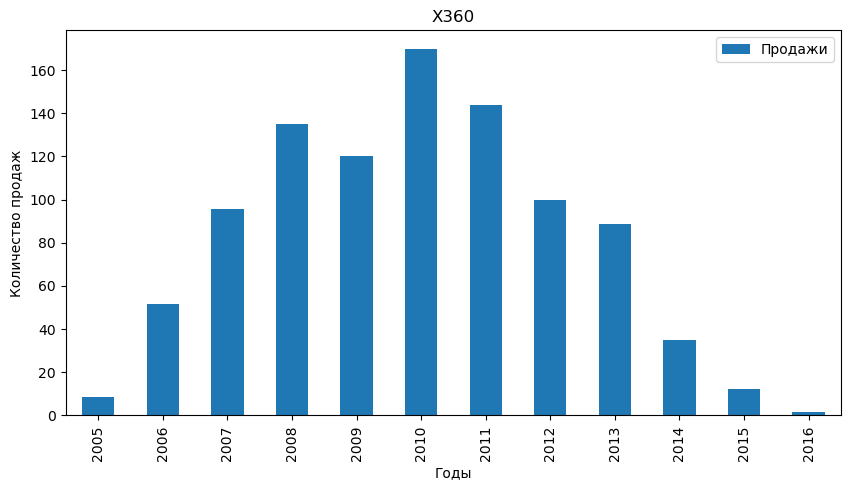

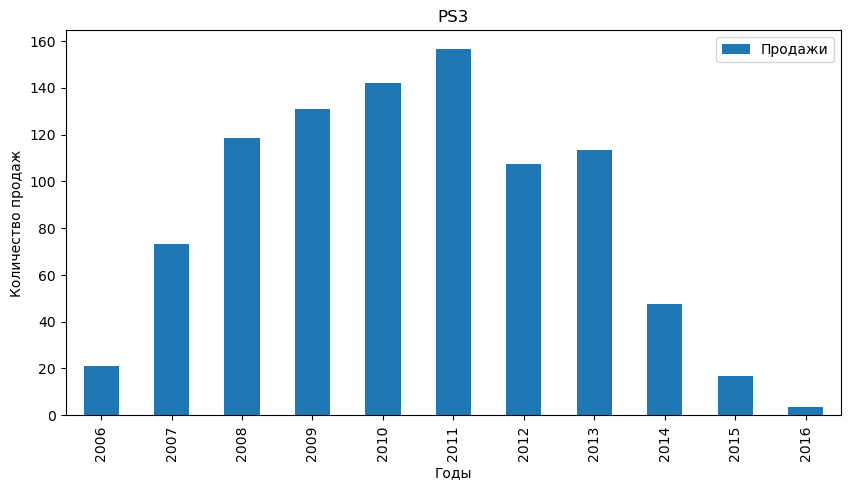

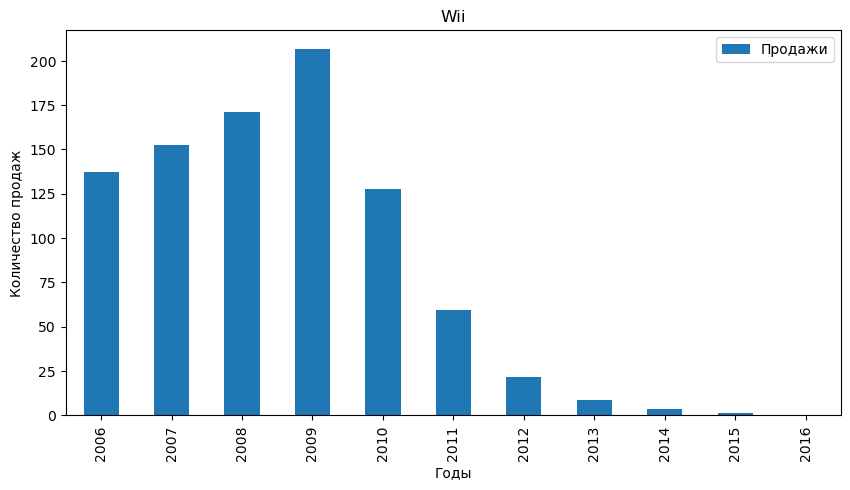

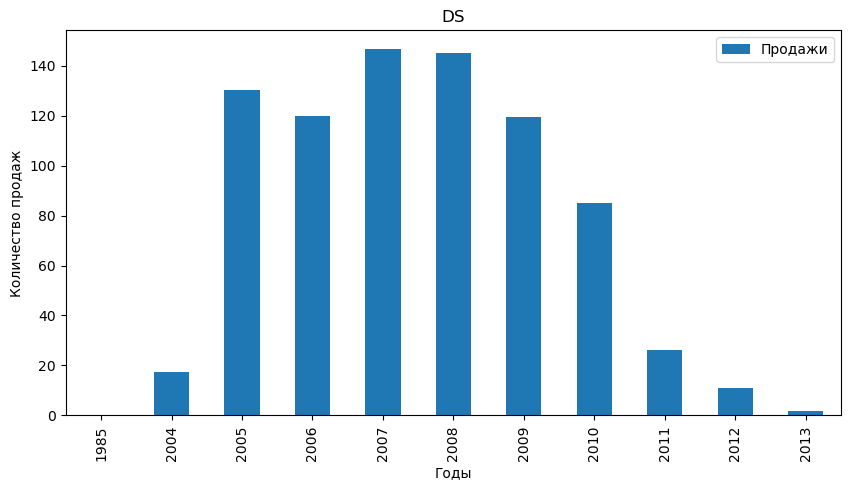

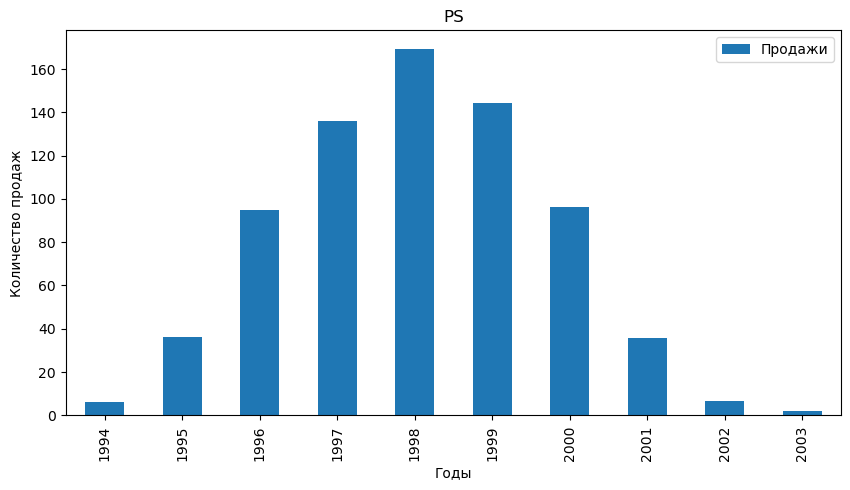

In [28]:
# В цикле выводим диаграмму распределения продаж по годам по каждой из платформ из топ-6
for platform in top6_platforms:
    table_top = data[data['platform']==platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    table_top.columns = ['Продажи']
    # Строим диаграмму
    table_top.plot(y='Продажи', kind = 'bar', figsize=(10,5))
    plt.title(platform)
    plt.xlabel('Годы')
    plt.ylabel('Количество продаж')
    plt.show()

Проанализировав полученные диаграммы, можно сделать вывод, что в среднем жизненный цикл каждой платформы составляет 9-10 лет. За этот период платформа переживает рост, пиковые значения и постепенное падение продаж. Большинство популярных платформ появилось в период 2004-2006 г\
Чтобы понять тенденции в развитии той или иной платформы и определить на каком этапе жизненного цикла она сейчас находится необходимо взять последние 2-3 года. Это поможет сделать достоверный прогноз по продажам на 2017 год. Таким образом, мы определим актуальный период - с 2014 по 2016 годы, помня о том, что данные за 2016 год представлены не в полном объеме. В дальнейшем при анализе будем работать только с данными по актуальному периоду, поэтому создадим новый датафрейм actual_data

In [29]:
actual_data = data.query('year_of_release>=2014')
actual_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,undefined,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,undefined,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,undefined,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,undefined,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Определим, какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

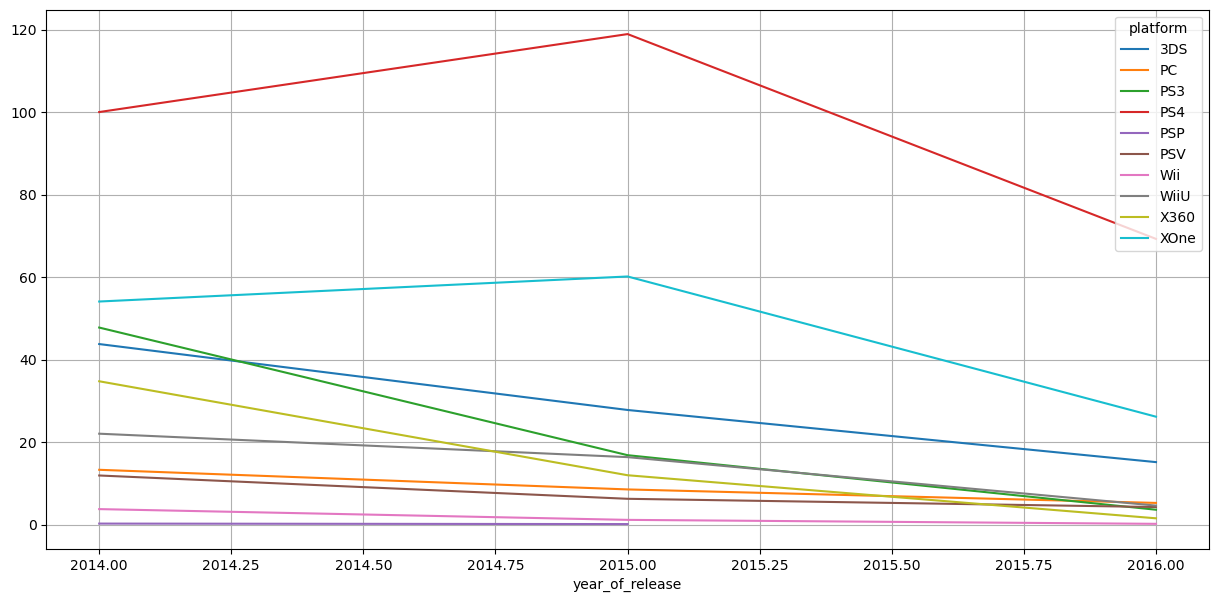

In [30]:
# Создаем сводную таблицу: группируем по столбцу 'year_of_release' и рассчитываем сумму для значений из столбца 'total_sales' по каждой платформе
# Строим линейный график
actual_platform_leaders = actual_data.pivot_table(index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc='sum')\
.plot(kind = 'line', grid=True, figsize=(15,7))

На диаграмме видно, что на всех платформах существует тенденция к уменьшению продаж. При этом необходимо помнить, что данные за 2016 год неполные, так что конечная точка по итогам года скорее всего увеличится для каждой из платформ. 
На данный момент наиболее перспективными видятся платформы с наибольшим числом продаж. Это (в порядке убывания) PS4, XOne, 3DS. Все остальные платформы находятся примерно на одном уровне продаж. \
Для того чтобы более предметно сделать выбор платформ следует рассмотреть медианные значения продаж. Для этого построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

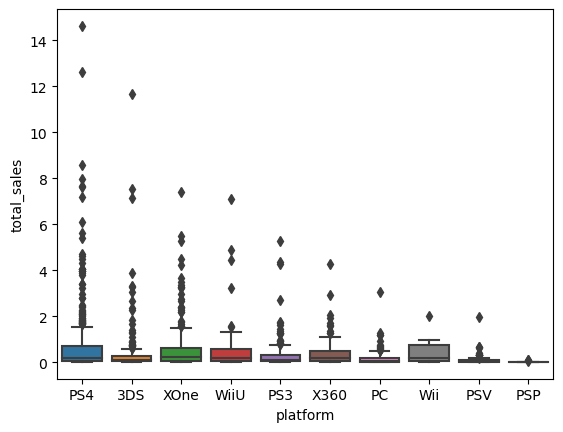

In [31]:
# Строим график "ящик с усами" для всех платформ
#plt.ylim(0,1)
sns.boxplot(data=actual_data, x='platform', y='total_sales')

Из графика видно, что у популярных платформ "усы" не превышают значения в 2 млн копий, а у большинства - 1 млн. Однако здесь можно наблюдать достаточно большое число выбросов - это популярные игры, которые также вносят большой вклад и в развитие платформы, и в общую выручку. Так, например, у платформ PS4, 3DS, XOne, WiiU таких топ-игр больше всего. Теперь рассмотрим более подробно медианные значения у каждой из платформ.

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

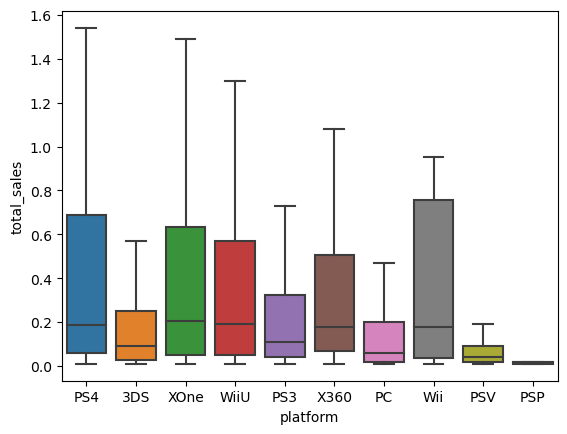

In [32]:
# Строим "ящик с усами" без выбросов
sns.boxplot(data=actual_data, x='platform', y='total_sales', showfliers=False)

На представленной диаграмме мы видим некоторые отличия от результатов линейного графика с анализом продаж. Здесь наибольшие медианные продажи характерны для платформ PS4, XOne (как в предыдущем), а также для платформ WiiU, X360, тогда как платформа 3DS демонстрирует меньшее значение. Судя по медианам, большинство игр продаются сотнями тысяч копий, порой доходя на некоторых платформах до 1,5 млн.\
В целом, эту пятерку платформ можно считать потенциально популярными при продаже компьютерных игр.

Посмотрим теперь, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сделаем это на примере платформы PS4.

0.4026614106810408

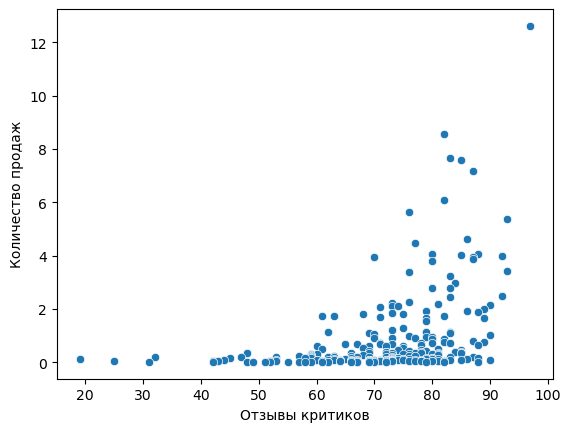

In [33]:
# Создаем таблицу, содержащую данные по выбранной платформе
ps4_table = actual_data.query('platform=="PS4"')
# Строим диаграмму рассеяния для определения зависимости продаж от отзывов критиков
sns.scatterplot(data=ps4_table, x='critic_score', y='total_sales')
plt.xlabel('Отзывы критиков')
plt.ylabel('Количество продаж')
# Находим коэффициент корреляции
ps4_table['critic_score'].corr(ps4_table['total_sales'])

По итогам анализа можно предположить наличие слабой положительной связи между отзывами критиков и продажами

-0.04013158947269732

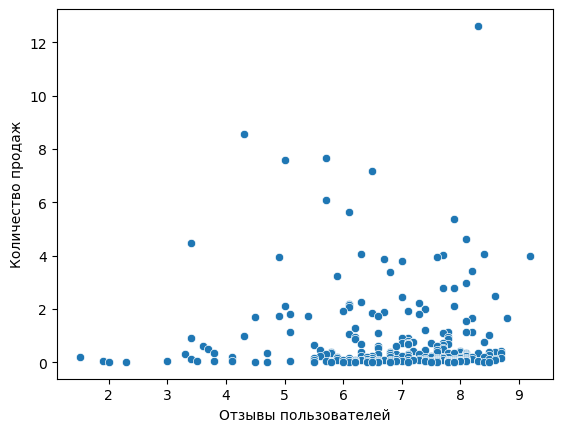

In [34]:
# Строим диаграмму рассеяния для определения зависимости продаж от отзывов пользователей
sns.scatterplot(data=ps4_table, x='user_score', y='total_sales')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Количество продаж')
# Находим коэффициент корреляции
ps4_table['user_score'].corr(ps4_table['total_sales'])

В данном случае связи между отзывами пользователей и продажами не наблюдается, о чем свидетельствует и диаграмма рассеяния, и коэффициент корреляции, равный -0,04.\
Теперь необходимо соотнести выводы с продажами игр на других платформах. Для этого создадим функцию, которая аргументом принимает название платформы и для нее строит диаграмму рассеянии и рассчитывает коэффициент корреляции

In [35]:
# Создаем функцию с одним аргументом
def corr_score_and_sales(actual_platform):
    platform_table = actual_data[actual_data['platform']==actual_platform]
    corr_critics = platform_table['critic_score'].corr(platform_table['total_sales'])
    corr_users = platform_table['user_score'].corr(platform_table['total_sales'])
    print(f'Коэффициент корреляции между отзывами критиков и продажами на платформе {actual_platform} составляет :', corr_critics)
    print(f'Коэффициент корреляции между отзывами пользователей и продажами на платформе {actual_platform} составляет:', corr_users)
    sns.scatterplot(data=platform_table, x='critic_score', y='total_sales')
    plt.title(actual_platform)
    plt.xlabel('Отзывы критиков')
    plt.ylabel('Количество продаж')
    plt.show()
    sns.scatterplot(data=platform_table, x='user_score', y='total_sales')
    plt.title(actual_platform)
    plt.xlabel('Отзывы пользователей')
    plt.ylabel('Количество продаж')
    plt.show()
    

Рассчитаем корреляцию для платформ, обозначенных нами,как потенциально прибыльные

Коэффициент корреляции между отзывами критиков и продажами на платформе XOne составляет : 0.428676943703332
Коэффициент корреляции между отзывами пользователей и продажами на платформе XOne составляет: -0.07038392806475818


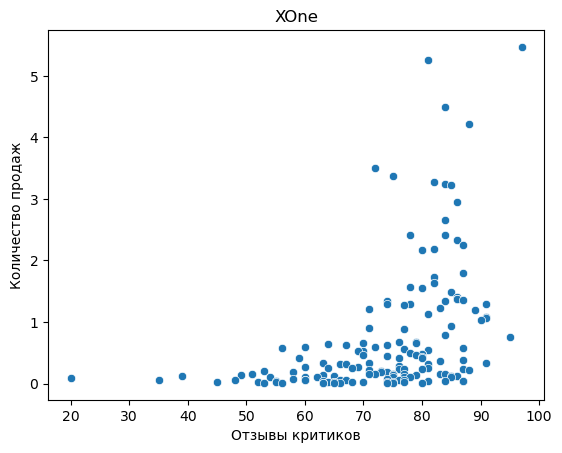

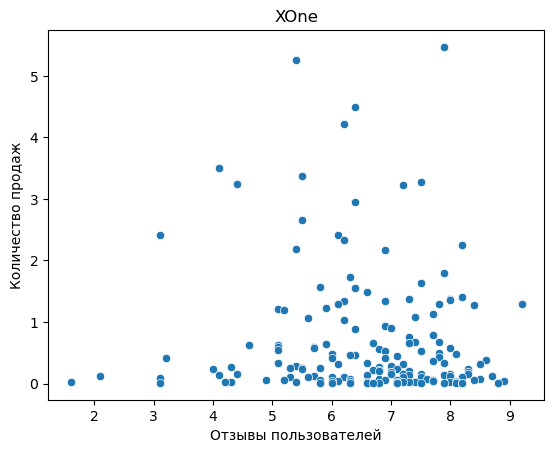

Коэффициент корреляции между отзывами критиков и продажами на платформе 3DS составляет : 0.31411749286905094
Коэффициент корреляции между отзывами пользователей и продажами на платформе 3DS составляет: 0.2151932718527029


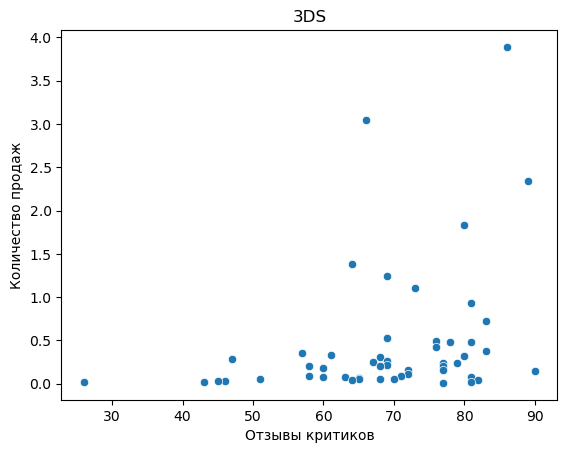

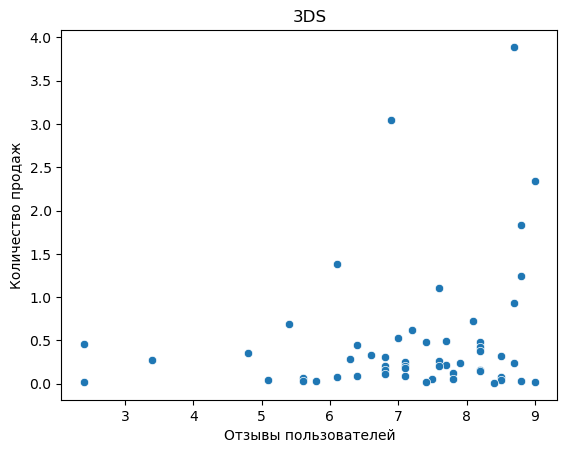

Коэффициент корреляции между отзывами критиков и продажами на платформе X360 составляет : 0.5257228356581521
Коэффициент корреляции между отзывами пользователей и продажами на платформе X360 составляет: -0.13844457094566504


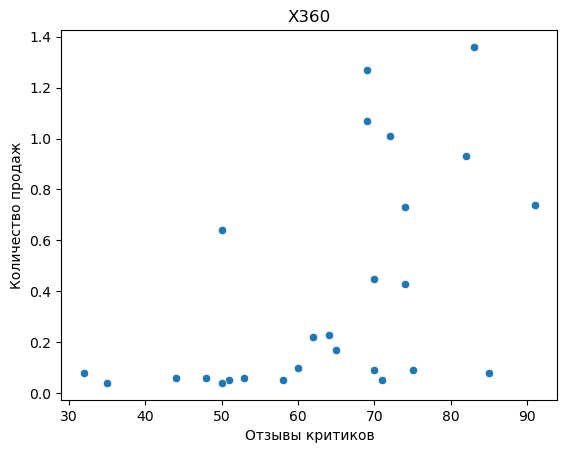

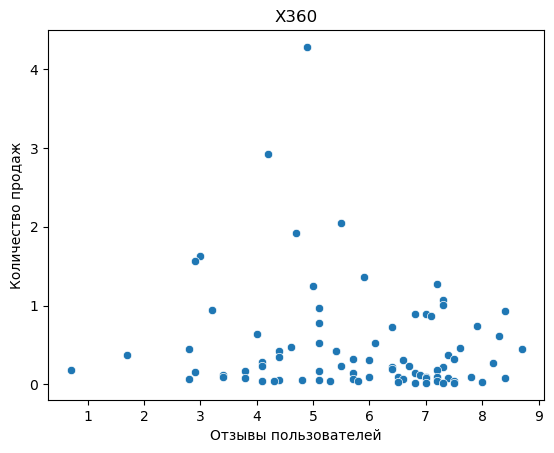

Коэффициент корреляции между отзывами критиков и продажами на платформе WiiU составляет : 0.37020141248088395
Коэффициент корреляции между отзывами пользователей и продажами на платформе WiiU составляет: 0.40792645792170795


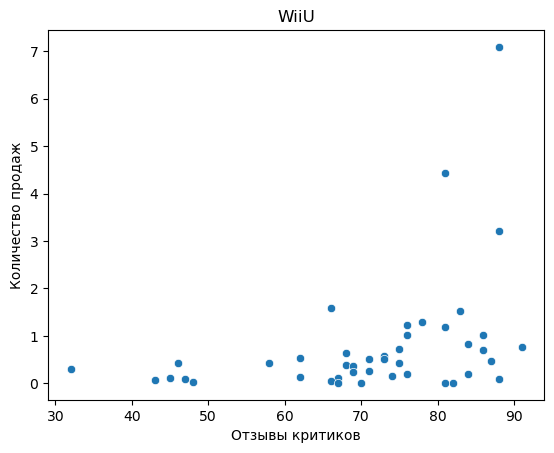

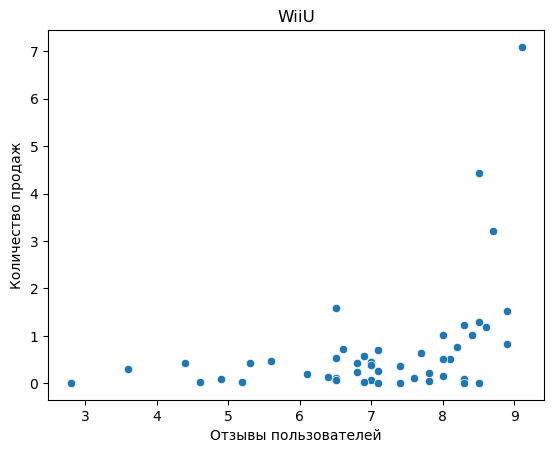

In [36]:
# Зададим список платформ, кроме PS4
platform_list=['XOne', '3DS', 'X360', 'WiiU']
# В цикле проходим по всем платформам из списка
for platform in platform_list:
    corr_score_and_sales(platform)

По итогам рассчетов можно сделать вывод, что отзывы критиков влияют на продажи в большей степени, нежели отзывы пользователей. Так, для платформы XOne коэффициент корреляции для отзывов критиков составил 0,4, тогда как коэффициент корреляции отзывов пользователей с продажами - только -0,07. \
Для платформы X360 также существует средняя корреляция между отзывами критиков и продажами (0,5), а между отзывами пользователей и продажами корреляции не наблюдается (-0,14)\
Для платформ 3DS и WiiU несколько другая картина. 
Для игр на платформе 3DS коэффициенты корреляции продаж и отзывов критиков и пользователей достаточно близки друг к другу (0,3 и 0,2 соответственно). Здесь можно говорить о том, что связи практически нет.\
На платформе WiiU коэффициенты корреляции также близки (0,37 для отзывов критиков и 0,4 для отзывов пользователей), что говорит о наличии слабой связи между отзывами и продажами.

Рассмотрим также общее распределение игр по жанрам и определим самые прибыльные жанры. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [37]:
# Создаем сводную таблицу: группируем по столбцу 'genre' и рассчитываем медиану для значений из столбца 'total_sales'
# и сразу сортируем по убыванию
table_genre = actual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').sort_values(by = 'total_sales', ascending=False)
table_genre

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


<AxesSubplot:ylabel='total_sales'>

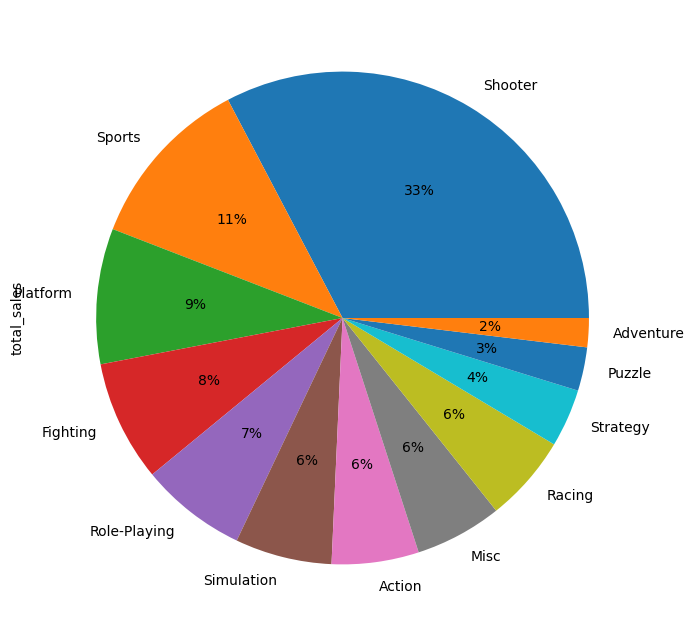

In [38]:
# Для большей наглядности построим диаграмму
table_genre.plot(kind='pie', figsize=(8,8), y='total_sales', autopct='%1.0f%%', legend=False)

Таким образом, игры с лучшими медианными продажами относятся к категории Shooter. Затем идут спортивные игры, игры в категории Platform, Fighting и Role-playing. Хуже всего продаются игры в категориях Strategy, Puzzle и Adventure

**Выводы по исследовательскому анализу**\
Проведя анализ некоторых показателей и зависимостей можно сделать следующие выводы:
- Наибольший пик популярности компьютерных игр приходится на 2008-2009 года. После 2009 года наблюдается спад, связанный с развитием мобильных платформ и социальных сетей.
- Самыми популярными за все время продаж компьютерных игр являются PS2, X360, PS3, Wii, Ds, PS
- Жизненный цикл платформы в среднем составляет 9-10 лет. Для достоверного прогноза на следующий год достаточно взять последние 2-3 года, поэтому нами был выделен актуальный период 2014-2016 годы.
- Потенциально прибыльными платформами на основе анализа были определены PS4, XOne, WiiU, X360, 3DS 
- По итогам проведенного корреляционного анализа мы выяснили, что отзывы критиков влияют на продажи в большей степени, нежели отзывы пользователей для платформ PS4, XOne, X360. Для платформ 3DS и WiiU коэффициенты корреляции продаж и отзывов критиков и пользователей достаточно близки друг к другу и свидетельствуют о наличии слабой связи
- Наиболее популярны игры в жанрах Shooter и Sport, наименьшей популярностью пользуются игры в жанрах Strategy, Puzzle и Adventure

## Часть 4. Составление портрета пользователя каждого региона
Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишим различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [39]:
# Создадим функцию, которая будет создавать графики распределения популярных платформ, жанров и рейтингов для пользователя конкретного региона
def portrait (col):
    actual_data.pivot_table(index = 'platform', values = col, aggfunc = 'sum').sort_values(ascending=False, by = col).head(5).plot(kind = 'bar', figsize=(15,5))
    plt.show
    actual_data.pivot_table(index = 'genre', values = col, aggfunc = 'sum').sort_values(ascending=False, by = col).head(5).plot(kind = 'bar', figsize=(15,5))
    plt.show
    actual_data.pivot_table(index = 'rating', values = col, aggfunc = 'sum').sort_values(ascending=False, by = col).plot(kind = 'bar', figsize=(15,5))
    plt.show

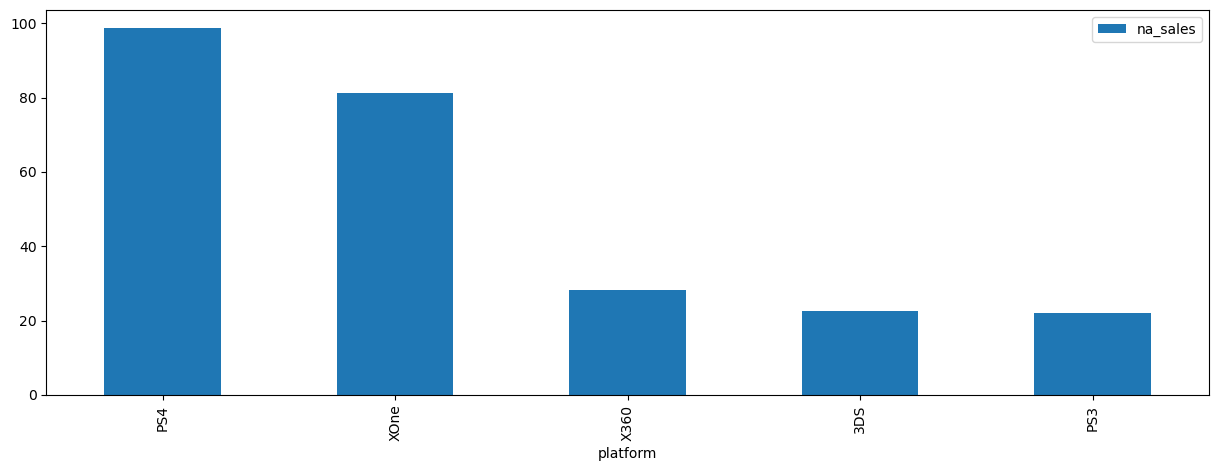

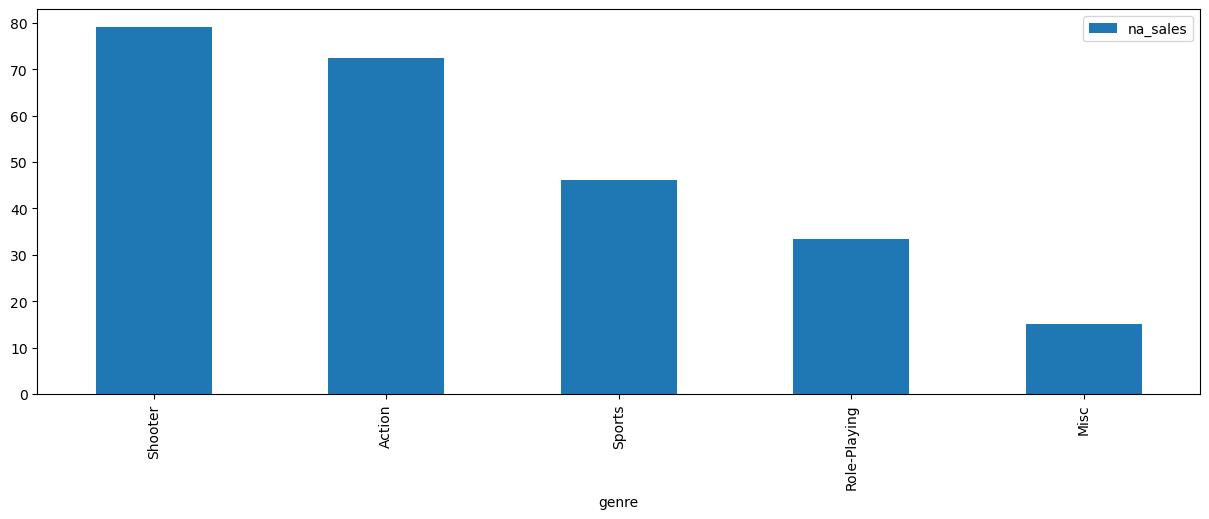

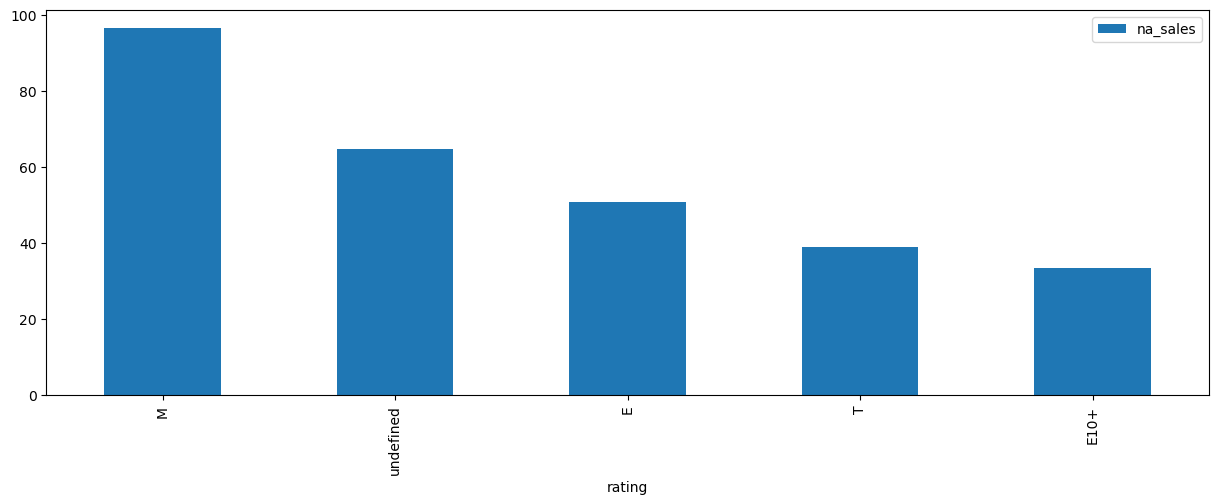

In [40]:
# Определяем портрет пользователя из Северной Америки
portrait('na_sales')

Топ-5 платформами для пользователей из Северной Америки являются PS4, XOne, X360, 3DS, PS3, причем первые две платформы имеют явное преимущество над другими. Самыми популярными жанрами стали Shooter и Action. Также в топ-5 вошли Sports, Role-playing и Misc. Что касается рейтинга, то здесь самым популярным является рейтинг М(для лиц старше 17 лет), на втором месте - игры без рейтинга. Также в топ вошли Е(для всех), Т(для лиц старше 13 лет), а также Е10+(для лиц старше 10 лет)

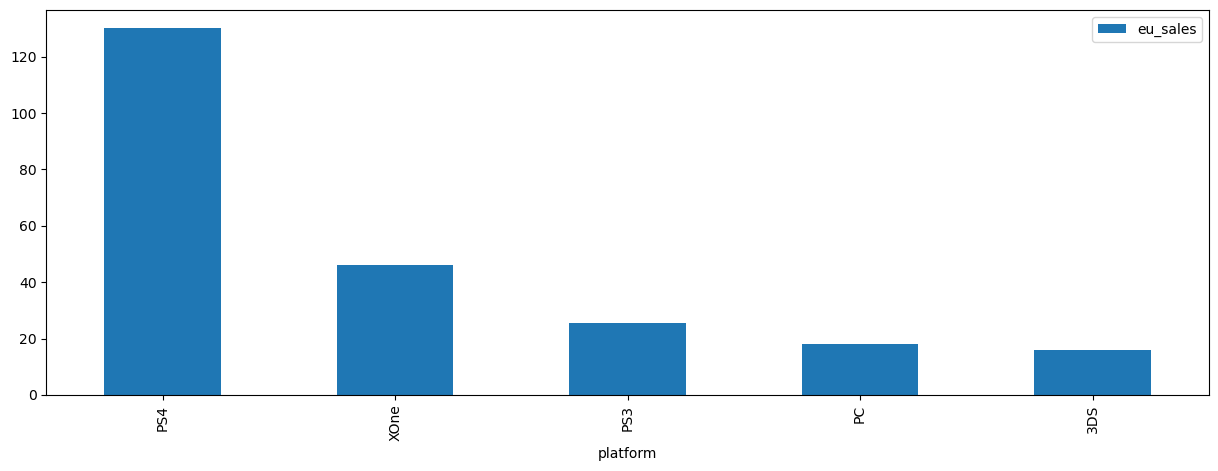

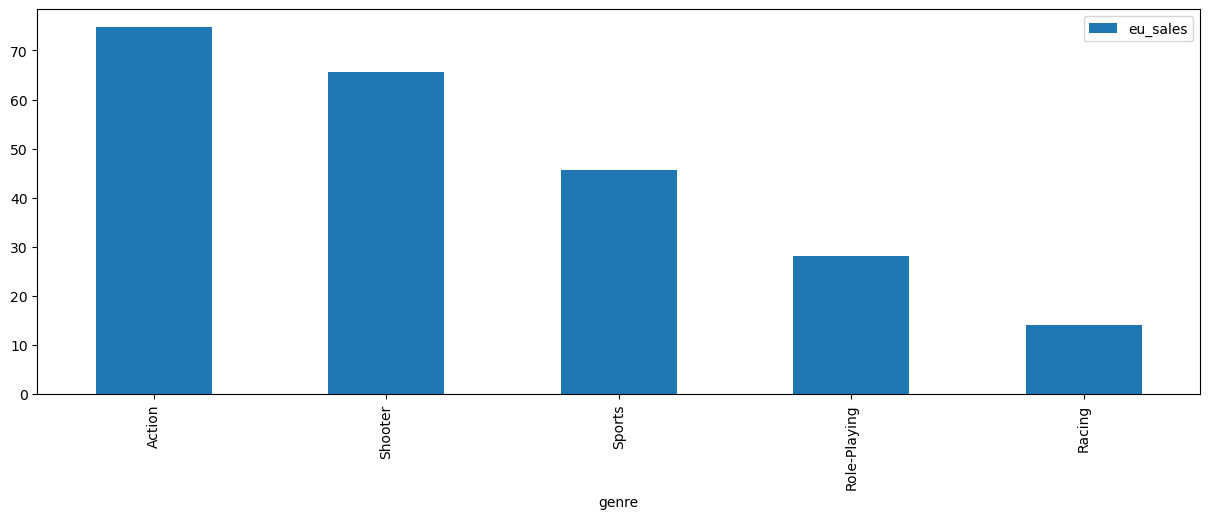

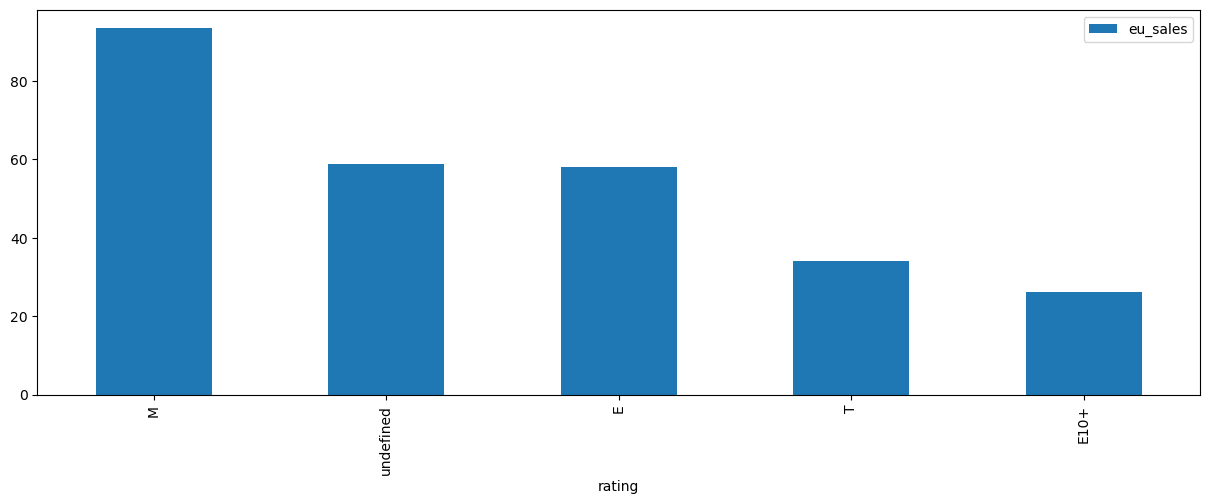

In [41]:
# Определяем портрет пользователя из Европы
portrait('eu_sales')

Самой популярной платформой для жителей Европы с большим отрывом является PS4, в топ-5 также входят XOne, PS3, PC, 3DS.  Самыми популярными жанрами стали Action и Shooter. Также в топ-5 вошли Sports, Role-playing и Racing. По рейтингу ситуация практически идентична пользователям из Северной Америки: самым популярным является рейтинг М(для лиц старше 17 лет), на втором-третьем местах игры с неопределенным рейтингом и игры с рейтингом Е(для всех), еще меньше игр маркировано Т(для лиц старше 13 лет) и Е10+(для лиц старше 10 лет)

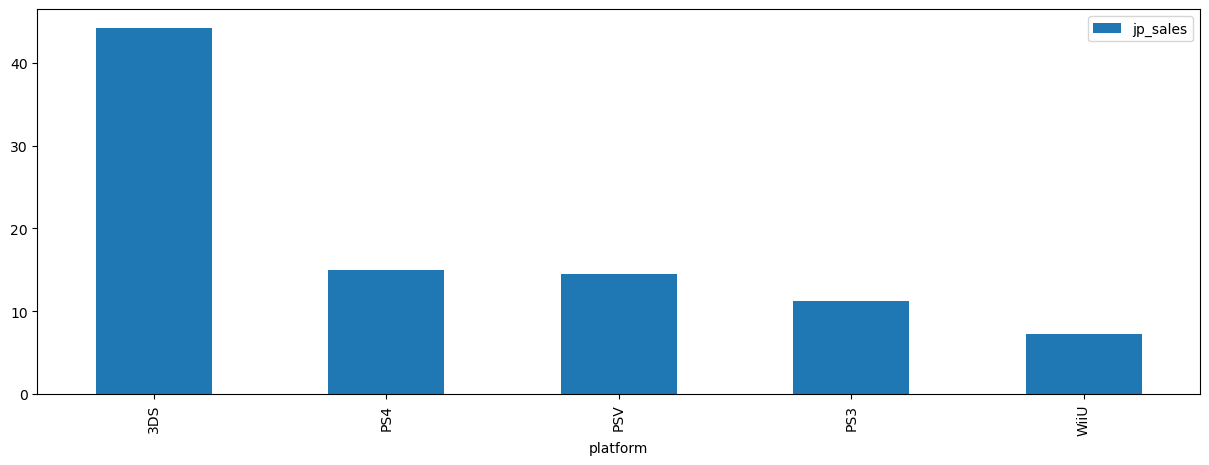

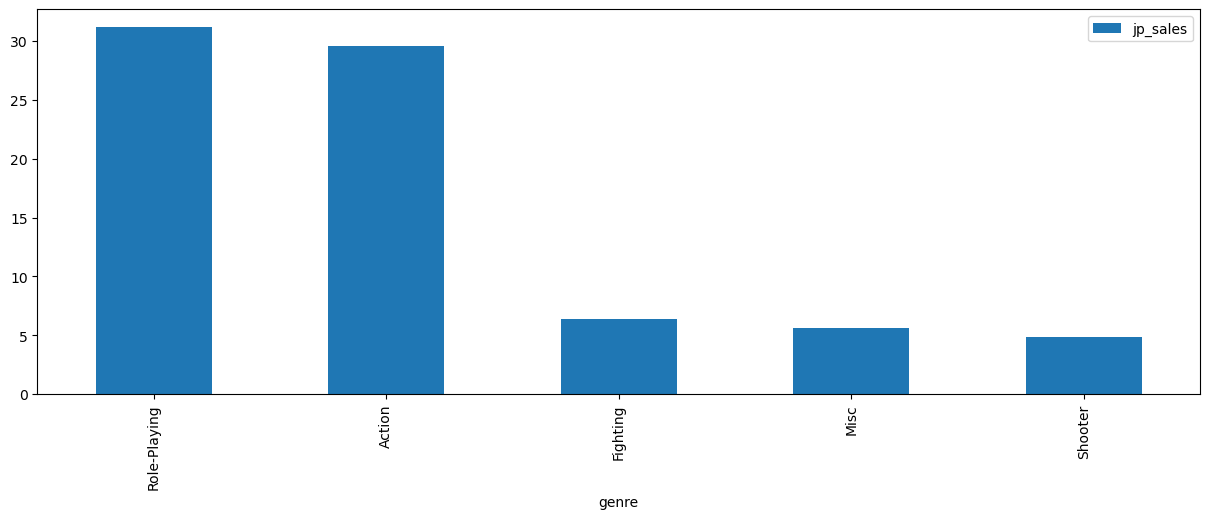

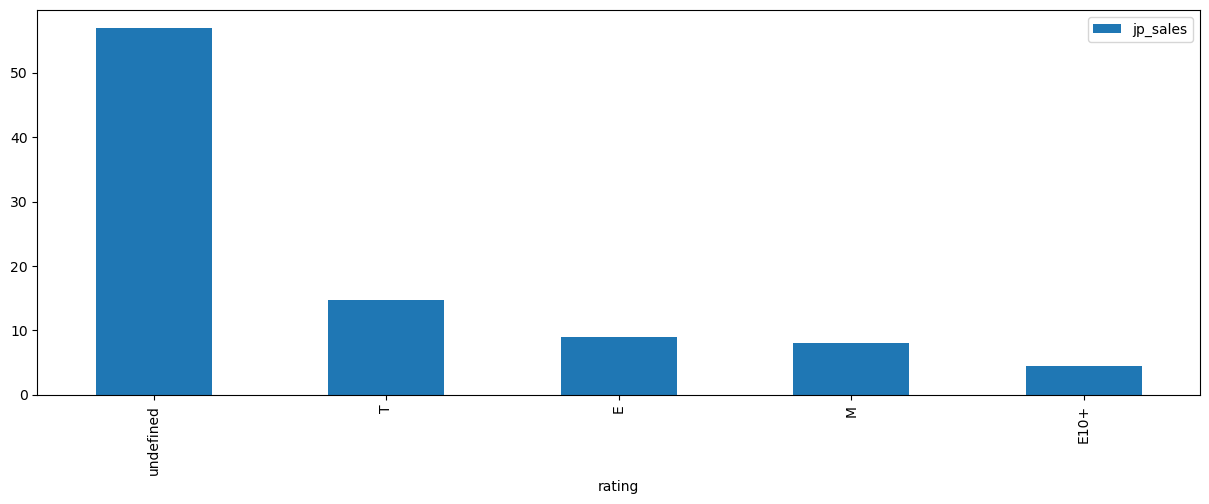

In [42]:
# Определяем портрет пользователя из Японии
portrait('jp_sales')

Для геймеров из Японии ситуация отличается. Здесь преобладающей с большим преимуществом является платформа 3DS, что неудивительно, поскольку она японского происхождения. Также в топ с большим отрывом вошли PS4, PSV, PS3 и WiiU.
По жанровому предпочтению портрет пользователя из Японии также сильно отличается от североамериканских и европейских. Самыми популярными являются игры в жанре Role-Playing и Action. Кроме того в пятерку вошли игры в жанрах Fighting, Misc, Shooter.
Подавляющее большинство игр в Японии не имеют рейтинговой маркировки (предположительно по причине того, что компания, которая ставит рейтинг действует, в основном, на территории Северной Америки). А среди тех, которые имеют выделяют T(13+) E(для всех) M (17+) и E10+(для лиц от 10 лет).

Таким образом, рассмотрев наиболее популярные платформы, жанры и рейтинги для геймеров из трех разных регионов, можно сделать вывод о том, что портреты пользователей из Северной Америки и Европы достаточно схожи, тогда как портрет геймера из Японии отличается по каждому критерию.

## Часть 5. Проверка гипотез
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую и альтернативную гипотезы для проверки гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Нулевая гипотеза будет утверждать о равенстве средних, а альтернативная будет ей противоположна\
Н0: Средние пользовательские рейтинги платформ Xbox One и PC равны\
Н1: Средние пользовательские рейтинги платформ Xbox One и PC не равны\
Определим значение alpha=0.05\
В данном случае у нас будет две выборки (для двух платформ), для каждой из которых будет считаться среднее. При этом оснований полагать, что дисперсии выборок будут совпадать, у нас нет (платформы не пересекаются). Поэтому для проверки гипотезы будем использовать метод для двух выборок с разными дисперсиями

In [43]:
# Формируем таблицу для платформы XOne
Xbox_One = actual_data.query('platform=="XOne"')
# Формируем таблицу для платформы PC
PC = actual_data.query('platform=="PC"')
alpha = .05
# Проводим проверку равенства двух средних
results = st.ttest_ind(Xbox_One['user_score'], PC['user_score'], equal_var=False, nan_policy='omit')
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668943
Не получилось отвергнуть нулевую гипотезу


Таким образом, гипотезу нулевую гипотезу мы не можем опровергнуть, поэтому будем считать, что она подтвердилась с определенной долей вероятности: средние пользовательские рейтинги платформ Xbox One и PC действительно равны

Проверим вторую гипотезу: "Средние пользовательские рейтинги жанров Action и Sports разные". Для этого сформулируем нулевую и альтернативную гипотезы. Нулевая гипотеза будет утверждать о равенстве средних, а альтернативная будет ей противоположна:\
Н0:Средние пользовательские рейтинги жанров Action и Sports равны\
Н1:Средние пользовательские рейтинги жанров Action и Sports разные\
В данном случае у нас будет две выборки (для двух жанров), для каждой из которых будет считаться среднее. При этом оснований полагать, что дисперсии выборок будут совпадать, у нас нет (жанры не пересекаются). Поэтому для проверки гипотезы будем использовать метод для двух выборок с разными дисперсиями

In [44]:
# Формируем таблицу для жанра Action
action = actual_data.query('genre=="Action"')
# Формируем таблицу для жанра Sports
sports = actual_data.query('genre=="Sports"')
alpha = .05
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False, nan_policy='omit')
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.182555038264477e-14
Отвергаем нулевую гипотезу


Таким образом, мы отвергаем нулевую гипотезу, подтверждая тем самым первоначальную гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные

## Общий вывод


Подведем итог проведенному исследованию. Нами был загружен и проанализирован архив с историческими данными о продажах игр, оценками пользователей и экспертов, с данными о жанрах и платформах.
Задача исследования состояла в том, чтобы выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.\
После загрузки и изучения исходных данных мы выяснили, что всего в таблице 16715 строк, при этом часть данных в некоторых столбцах была пропущена по различным причинам. Была проведена предварительная обработка данных, которая включала в себя изменение наименований столбцов, замена типов данных для  столбцов 'year_of_release' и 'user_score' на числовой и вещественный соответственно. После проведенного анализа пропусков было решено удалить строки с пропусками в столбцах 'name' и 'year_of_release'(потери составили порядка 1,6% от общего объема датасета), в столбце 'rating' заменили пропуски на значение 'undefined'(т.е. рейтинг для конкретной игры по различным причинам не определен), а также заменили редкие значения на более частые аналоги. Пропуски в столбцах 'user_score' и 'critic_score' оставили, поскольку отстуствие оценки - это показатель того, что либо игра была не популярной и не получила оценок, либо игра новая и также еще не оценена. Кроме того мы создали новый столбец, которых хранит в себе суммарные продажи во всех регионах.\
Исследовательский анализ данных включал в себя проверку на аномалии (их не выявлено). Было изучено распределение игр по годам. Мы пришли к выводу, что компьютерные игры начали свое развитие после 1994 года, бурный рост приходися на период с 2000 по 2009 годы. После 2009 года наблюдается спад числа компьютерных игр, который может быть связан с переходом части пользователей на мобильные платформы и в социальных сети. \
Также были определены наиболее популярные платформы за все годы: PS2, X360, PS3, Wii, Ds, PS. Анализ их жизненного цикла показал, что средняя продолжительность жизни платформы составляет 10 лет. За этот период платформа переживает рост, пиковые значения и постепенное падение продаж. \
Для дальнейшего анализа был определен актуальный период с 2014 по 2016 годы, который позволил  сделать достоверный прогноз по продажам на 2017 год, тем самым выполнив стоящую перед нами задачу.\
Современные тенденции в развитии компьютерных игр отражают отрицательную динамику. На всех платформах уменьшаются продажи. На данный момент наиболее перспективными будут платформы с наибольшим числом продаж. Это (в порядке убывания) PS4, XOne, 3DS. К этому списку мы также добавили еще две платформы - WiiU, X360, которые имеют наибольшие медианные продажи. В целом, эту пятерку платформ можно считать потенциально популярными при продаже компьютерных игр.\
Корреляционный анализ числа продаж и отзывов показал небольшое влияние отзывов критиков на число проданных копий для платформ PS4,XOne, X360, тогда как отзывы пользователей вообще не оказывают никакого влияния. Для платформ 3DS и WiiU коэффициенты корреляции продаж и отзывов критиков и пользователей достаточно близки друг к другу и свидетельствуют о наличии слабой связи.
На основании анализа жанровой привлекательности игр, можно сказать, что наиболее популярны игры в жанрах Shooter и Sports, менее привлекательны жанры Platform, Fighting и Role-playing и меньше всего пользуются популярностью игры в жанрах Puzzle Adventure.\
Также были составлены портреты пользователей из разных регионов. Так, типичный геймер из Северной Америки использует платформы PS4 или XOne, играет в шутер или экшн в игру с рейтингом M(17+). Портрет геймера из Европы схож с предыдущим - это пользователь платформы PS4, играющий в экшн или шутер, при этом игра чаще всего имеет маркировку М (17+). А вот портрет типичного геймера из Японии несколько другой - это пользователь платформы 3DS, выбирающий ролевую игру или экшн. При этом игра чаще всего не имеет рейтинговой маркировки.\
Еще одним разделом стала проверка двух гипотез. Она показала, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а вот средние пользовательские рейтинги жанров Action и Sports разные.\
Таким образом, интернет-магазину «Стримчик» стоит обратить внимание на следующие перспективные платформы: PS4, XOne, 3DS,  WiiU, X360. В зависимости от рынка, на который магазин планирует выйти, ставку следует сделать либо на игры в жанре Action или Shooter (если целевая аудитория проживает в Северной Америке или Европе), либо на игры в жанре Role-Playing и Action (если целевая аудитория проживает в Японии). 